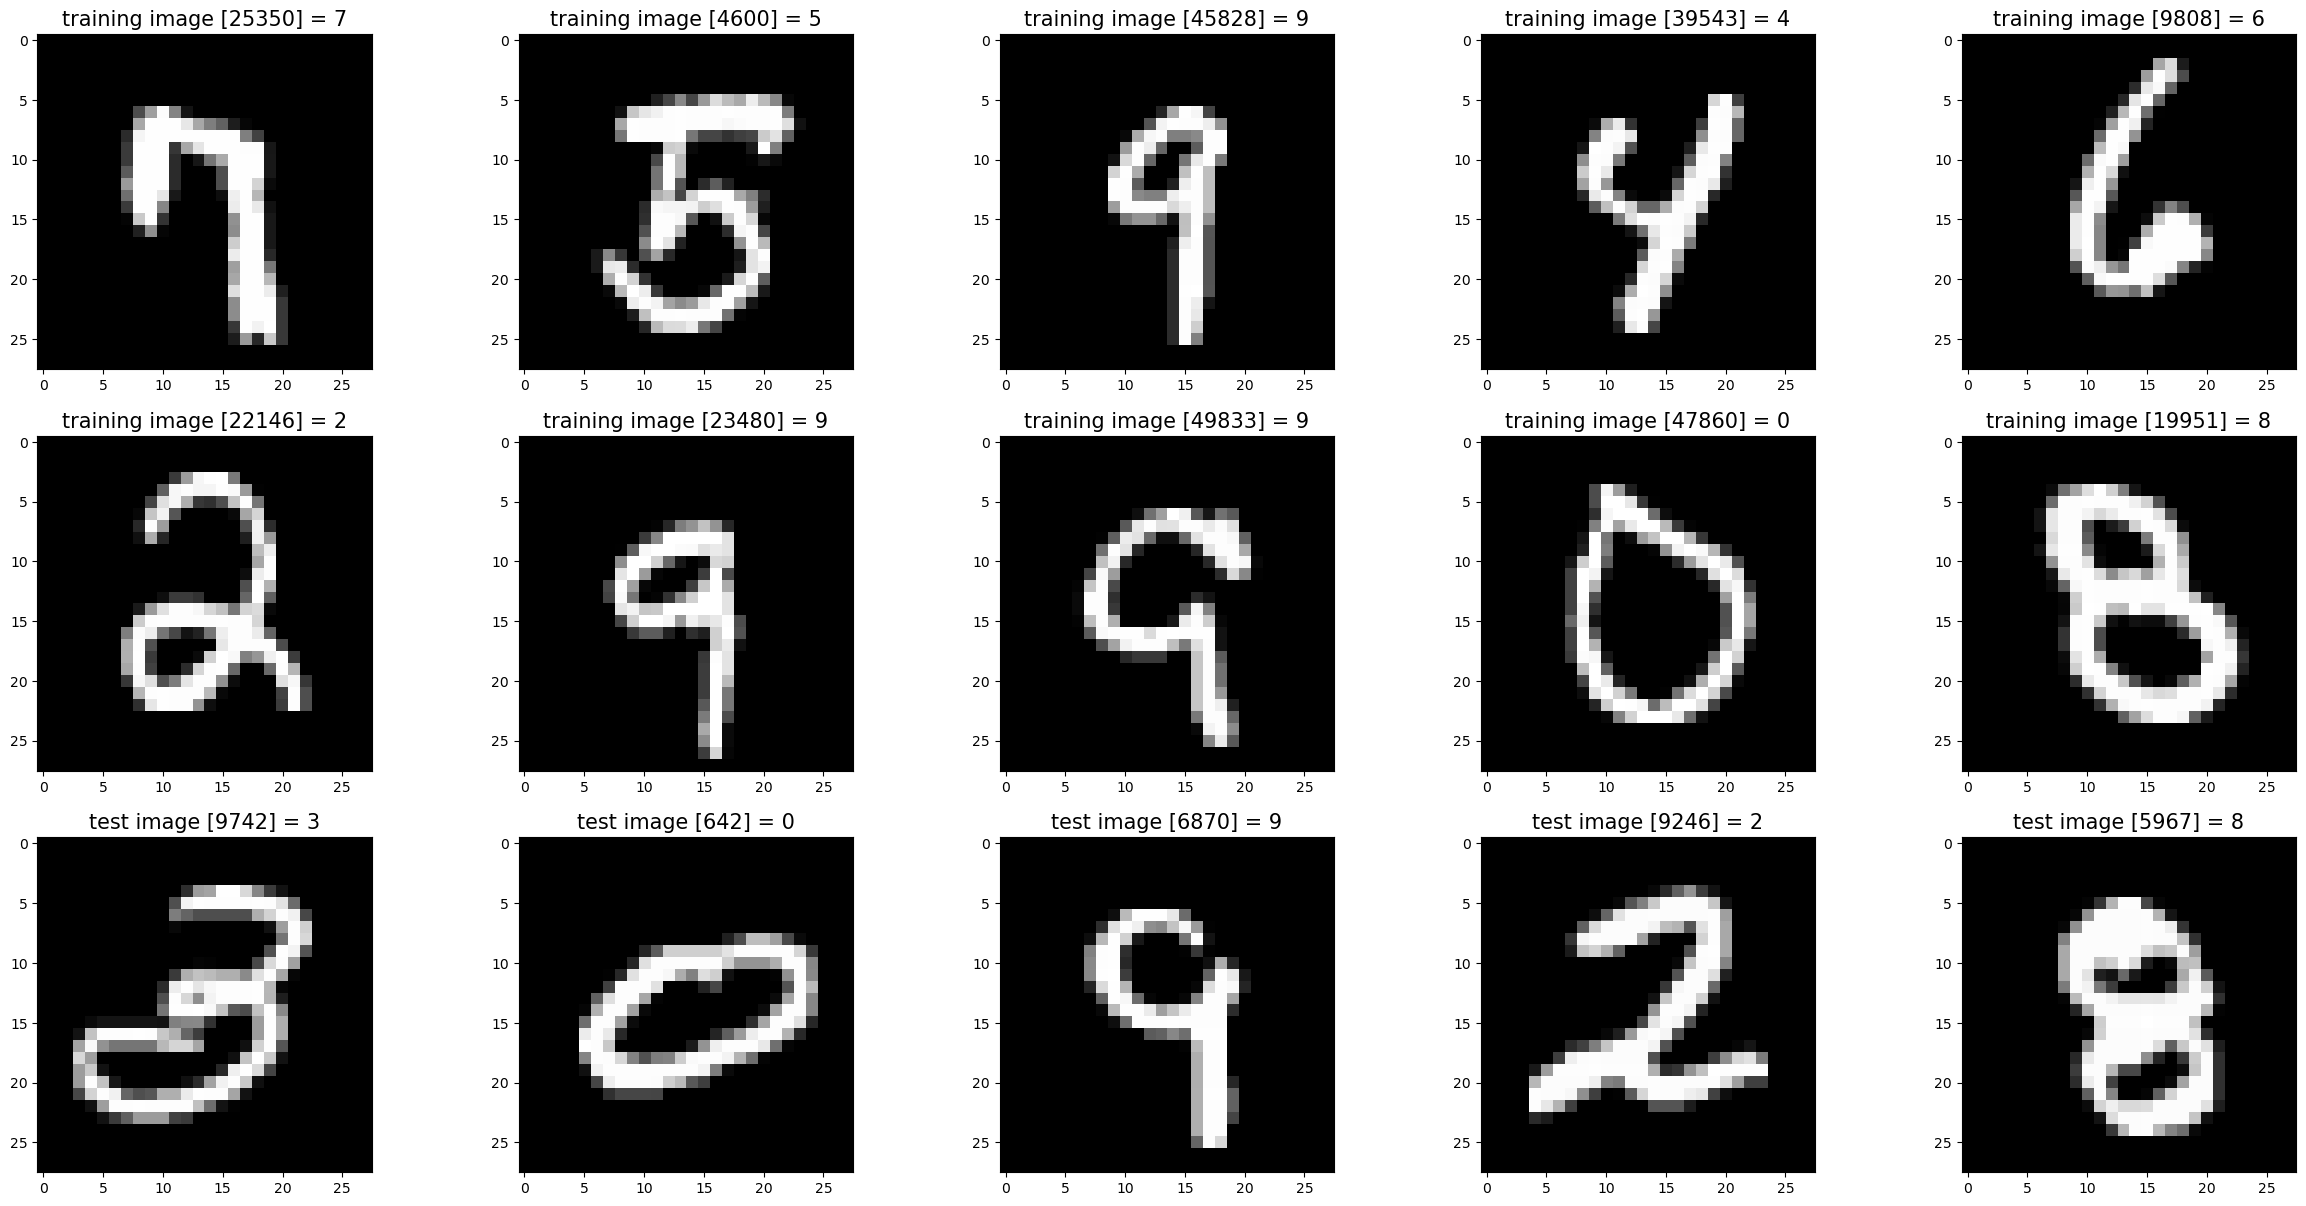

In [2]:
#
# Verify Reading Dataset via MnistDataloader class
#
%matplotlib inline
import random
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import struct
from array import array
from os.path  import join
from MnistReader import MnistDataloader

#
# Set file paths based on added MNIST Datasets
#
input_path = 'data'
training_images_filepath = join(input_path, 'train-images-idx3-ubyte/train-images-idx3-ubyte')
training_labels_filepath = join(input_path, 'train-labels-idx1-ubyte/train-labels-idx1-ubyte')
test_images_filepath = join(input_path, 't10k-images-idx3-ubyte/t10k-images-idx3-ubyte')
test_labels_filepath = join(input_path, 't10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte')

#
# Helper function to show a list of images with their relating titles
#
def show_images(images, title_texts):
    cols = 5
    rows = int(len(images)/cols) + 1
    plt.figure(figsize=(30,20))
    index = 1    
    for x in zip(images, title_texts):        
        image = x[0]        
        title_text = x[1]
        plt.subplot(rows, cols, index)        
        plt.imshow(image, cmap=plt.cm.gray)
        if (title_text != ''):
            plt.title(title_text, fontsize = 15);        
        index += 1

#
# Load MINST dataset
#
mnist_dataloader = MnistDataloader(training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath)
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()

#
# Show some random training and test images 
#
images_2_show = []
titles_2_show = []
for i in range(0, 10):
    r = random.randint(1, 60000)
    images_2_show.append(x_train[r])
    titles_2_show.append('training image [' + str(r) + '] = ' + str(y_train[r]))    

for i in range(0, 5):
    r = random.randint(1, 10000)
    images_2_show.append(x_test[r])        
    titles_2_show.append('test image [' + str(r) + '] = ' + str(y_test[r]))    

show_images(images_2_show, titles_2_show)

In [3]:
x_train = np.array(x_train)
y_train = np.array(y_train) 
x_test = np.array(x_test)
y_test = np.array(y_test)

n = 10

if n == 2:
    mask = (y_train == 1) | (y_train == 0)
    x_train = x_train[mask]
    y_train = y_train[mask]
    
    mask = (y_test == 1) | (y_test == 0)
    x_test = x_test[mask]
    y_test = y_test[mask]

In [4]:
y_test == 0

array([False, False, False, ..., False, False, False])

In [5]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))

In [6]:
# Нормализация значений пикселей перед подачей данных персептрону
def normalize(img):
    return np.round(img / 255) # округление до ближайщего целого


# Кодирование меток в унитарном коде
def one_hot(arr):
    y = np.zeros((arr.size, arr.max() + 1))
    y[np.arange(arr.size), arr] = 1
    return y.astype(np.uint8)

# перевод изображения из NxM в K размерность

def flatten(df):
    arrays = []
    for arr in df:
        new_array = np.append(arr.flatten(), 1)
        arrays.append(new_array)
    return np.array(arrays)

def flatten2(arr: np.ndarray):
    print(arr.shape)
    flatten_array = np.zeros((arr.shape[0], arr.shape[1] * arr.shape[2] + 1))
    i = 0
    for array in arr:
        flatten_array[i] = np.append(array.flatten(), 1)
        #flatten_array[i] = array.flatten()
    return flatten_array

In [7]:
y_train = one_hot(y_train) 
y_test = one_hot(y_test)

In [8]:
x_train = flatten(normalize(x_train))

# Шаг 1

In [9]:
import seaborn as sns
weights = np.random.randn(n, 784)
weights = np.zeros((784, n))
bs = np.random.rand(n)
weights = np.vstack([weights, bs])

In [10]:
print(x_train.shape)
print(weights.shape)

(60000, 785)
(785, 10)


# Шаг 2

In [11]:
# функция активации

def sigmoid(v):
    return 1 / (1 + np.exp(-v))

In [12]:
def predict(arr, weights):
    return sigmoid(np.dot(arr, weights))

In [13]:
learning_rate = 0.1

for epoch in range(10):
    for i in range(len(x_train)):
        y_out = sigmoid(x_train[i] @ weights) # перемножение матриц
        errors = y_train[i] - y_out # вектор ошибок
        weights += learning_rate * np.outer(x_train[i], errors)
    print(f'Эпоха {epoch}')

Эпоха 0
Эпоха 1
Эпоха 2
Эпоха 3
Эпоха 4
Эпоха 5
Эпоха 6
Эпоха 7
Эпоха 8
Эпоха 9


<AxesSubplot:>

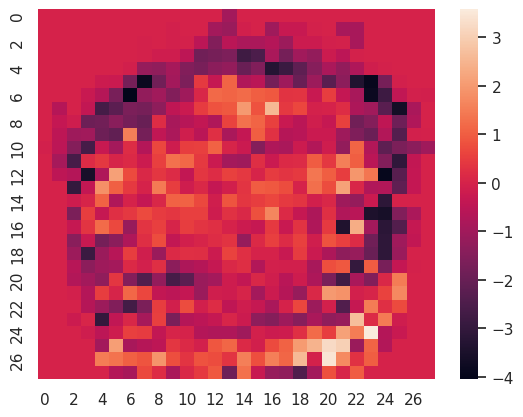

In [26]:
sns.heatmap(np.reshape(weights[:-1, n - 1], (28, 28)))

In [30]:
#sns.heatmap(np.reshape(weights[:-1, 1], (28, 28)))
fig, axs = plt.subplots(2, 5, figsize=(100, 100))
for i in range(2):
    for j in range(5):
        index = i * 5 + j
        data = np.reshape(weights[:-1, index], (28, 28))
        axs[i, j].imshow(data)

plt.tight_layout()
plt.show()

Точность: 84.35000000000001


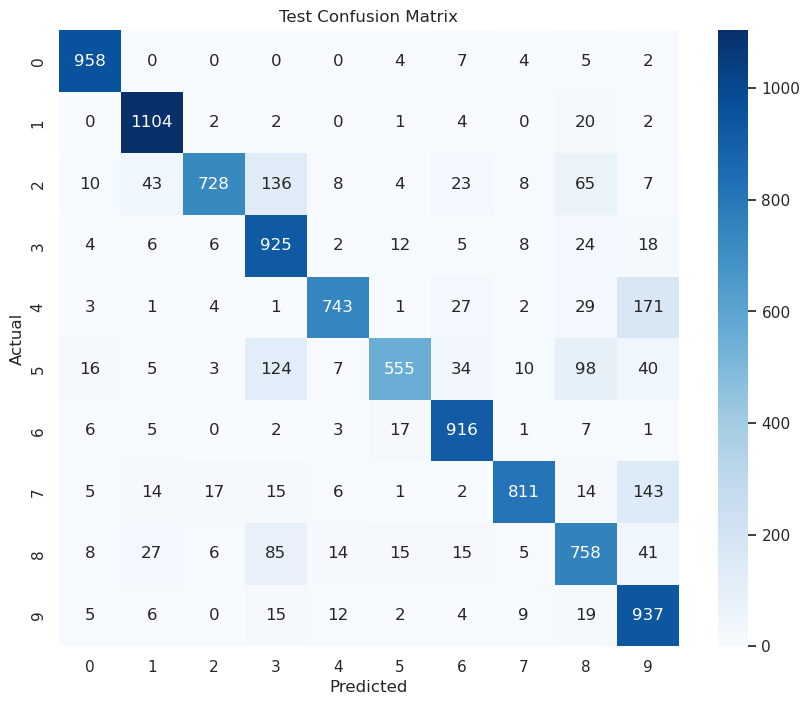

In [31]:
#test_0 = x_test[5]
#plt.imshow(test_0, cmap='gray')
#test_0 = normalize(test_0)
#t = np.append(test_0.flatten(), 1)
#np.round(predict(t, weights))
confusion_matrix_test = np.zeros((n, n))
correct_predictions = 0

test_1 = None

for i in range(len(x_test)):
    test = x_test[i]
    test = normalize(test)
    test = np.append(test.flatten(), 1)
    predicted_class = np.argmax(predict(test, weights))
    #print(np.sum(predict(test, weights)))
    #predicted_class = np.argmax(result)
    actual_class = np.argmax(y_test[i])

    if predicted_class == actual_class:
        correct_predictions += 1

    confusion_matrix_test[actual_class, predicted_class] += 1

print(f'Точность: {correct_predictions / len(x_test) * 100}')

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix_test, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Test Confusion Matrix')
plt.show()
 

In [48]:
import numpy as np

# Инициализация
np.random.seed(0)
x_train = np.random.rand(3, 4)  # Случайная матрица 3x4
x_train = np.hstack([x_train, np.ones((3, 1))])  # Добавление столбца смещения
y_train = np.array([0, 1, 0])  # Истинные метки
weights = np.random.rand(5)  # Случайные веса (4 веса для признаков и 1 для смещения)
learning_rate = 0.1

# Сигмоидальная функция
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Обучение
for epoch in range(30):
    for i in range(len(x_train)):
        y_out = sigmoid(np.matmul(x_train[i], weights))  # Перемножение матриц
        errors = y_train[i] - y_out  # Вектор ошибок
        weights += learning_rate * x_train[i] * errors  # Обновление весов
    print(f'Эпоха {epoch}, Веса: {weights}')


Эпоха 0, Веса: [ 0.47158665  0.86504252 -0.01675639  0.03663281 -0.0944921 ]
Эпоха 1, Веса: [ 0.38708112  0.8149996  -0.0933042  -0.001959   -0.19094189]
Эпоха 2, Веса: [ 0.31351074  0.77454375 -0.15956317 -0.02975078 -0.27073723]
Эпоха 3, Веса: [ 0.24945004  0.74239532 -0.21687576 -0.04822464 -0.33609566]
Эпоха 4, Веса: [ 0.19339691  0.71721058 -0.26665859 -0.0589144  -0.38934095]
Эпоха 5, Веса: [ 0.14396486  0.69775088 -0.31022041 -0.06322193 -0.43261206]
Эпоха 6, Веса: [ 0.09996038  0.68295054 -0.34868862 -0.06234684 -0.46774739]
Эпоха 7, Веса: [ 0.06039354  0.67192583 -0.38299868 -0.05728045 -0.49627036]
Эпоха 8, Веса: [ 0.02445866  0.66395735 -0.41391225 -0.04882777 -0.51942033]
Эпоха 9, Веса: [-0.00849452  0.65846433 -0.44204426 -0.03763772 -0.53819743]
Эпоха 10, Веса: [-0.03898959  0.65497888 -0.46788993 -0.02423246 -0.55340699]
Эпоха 11, Веса: [-0.06744857  0.65312372 -0.49184852 -0.00903282 -0.56569821]
Эпоха 12, Веса: [-0.09421251  0.65259379 -0.51424273  0.00762108 -0.575595

Epoch 1, Average Loss: 0.3122854893615573
Epoch 2, Average Loss: 0.3237421789526409
Epoch 3, Average Loss: 0.316279072268534
Epoch 4, Average Loss: 0.30812585504214673
Epoch 5, Average Loss: 0.3009473005461464
Epoch 6, Average Loss: 0.29480656578607173
Epoch 7, Average Loss: 0.2896063313819665
Epoch 8, Average Loss: 0.2852294719974364
Epoch 9, Average Loss: 0.2815606625852434
Epoch 10, Average Loss: 0.27849343399025767
Epoch 11, Average Loss: 0.2759331083732974
Epoch 12, Average Loss: 0.27379755531854544
Epoch 13, Average Loss: 0.27201671474788797
Epoch 14, Average Loss: 0.2705314956731934
Epoch 15, Average Loss: 0.26929243053562285
Epoch 16, Average Loss: 0.26825830455333277
Epoch 17, Average Loss: 0.26739487496808023
Epoch 18, Average Loss: 0.26667373125950966
Epoch 19, Average Loss: 0.26607131081256064
Epoch 20, Average Loss: 0.2655680650724067
Epoch 21, Average Loss: 0.265147762020083
Epoch 22, Average Loss: 0.2647969074405415
Epoch 23, Average Loss: 0.26450426723025433
Epoch 24, A

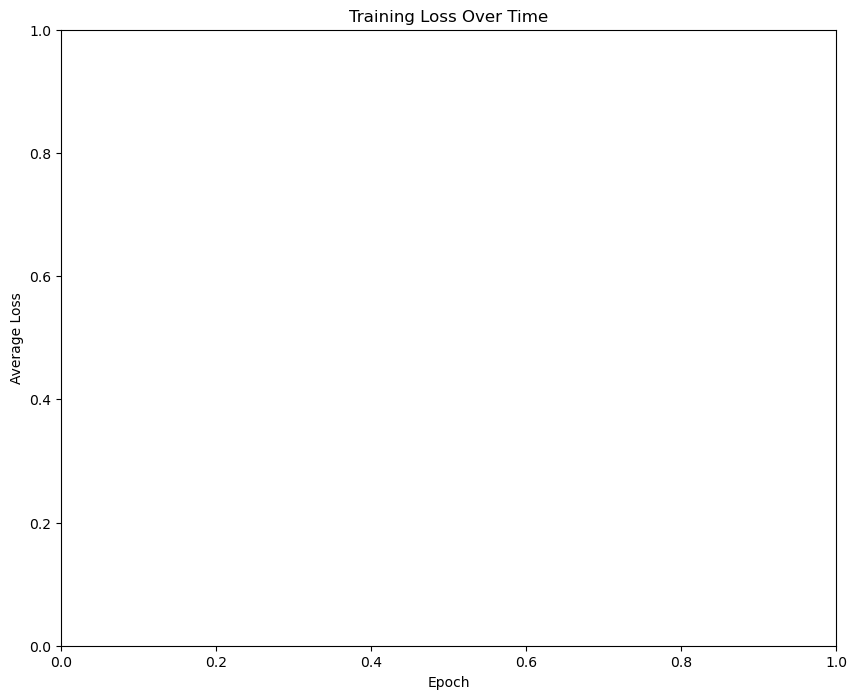

In [49]:
import numpy as np
import matplotlib.pyplot as plt

# Функция активации сигмоида
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Добавление смещения к входным данным
def add_bias(X):
    return np.concatenate([X, np.ones((X.shape[0], 1))], axis=1)

# Гипотетическая обучающая выборка и метки
x_train = np.array([
    [0.1, 0.2, 0.3],
    [0.2, 0.3, 0.4],
    [0.4, 0.5, 0.6],
    [0.5, 0.6, 0.7],
    [0.7, 0.8, 0.9]
])

# Добавление смещения
x_train = add_bias(x_train)

y_train = np.array([0, 1, 0, 1, 1])

# Инициализация весов и скорости обучения
weights = np.random.randn(4)  # 4 веса, включая смещение
weights = np.zeros((4, ))
#learning_rate = 0.1
learning_rate = 1

# Обучение
total_loss = 0

for epoch in range(30):
    for i in range(len(x_train)):
        y_out = sigmoid(np.matmul(x_train[i], weights))  # Скалярное произведение и активация
        errors = y_train[i] - y_out  # Вектор ошибок

        # Вычисление квадратичной ошибки и добавление к суммарной ошибке
        loss = np.square(errors)
        total_loss += loss

        # Обновление весов
        weights += learning_rate * x_train[i] * errors

    # Вывод средней ошибки после каждой эпохи
    average_loss = total_loss / len(x_train)
    print(f"Epoch {epoch+1}, Average Loss: {average_loss}")

    # Сброс суммарной ошибки для следующей эпохи
    total_loss = 0

# Отображение результатов
plt.figure(figsize=(10, 8))
plt.xlabel('Epoch')
plt.ylabel('Average Loss')
plt.title('Training Loss Over Time')
plt.show()


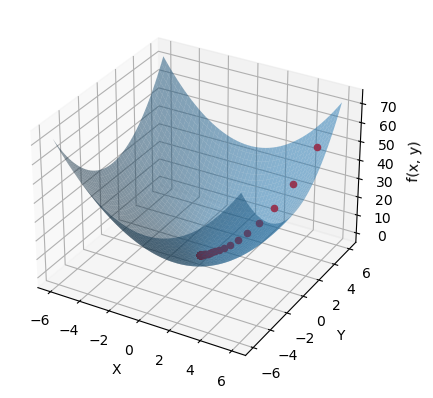

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Определяем функцию и её градиент
def func(x, y):
    return x ** 2 + y ** 2

def grad(x, y):
    return np.array([2 * x, 2 * y])

# Параметры градиентного спуска
learning_rate = 0.1
iterations = 50
current_point = np.array([5.0, 5.0])

# Создаем график
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Создаем данные для графика
x = np.linspace(-6, 6, 50)
y = np.linspace(-6, 6, 50)
x, y = np.meshgrid(x, y)
z = func(x, y)

# Рисуем поверхность
ax.plot_surface(x, y, z, alpha=0.5)

# Процесс градиентного спуска
for i in range(iterations):
    ax.scatter(current_point[0], current_point[1], func(current_point[0], current_point[1]), color='red')
    gradient = grad(current_point[0], current_point[1])
    current_point -= learning_rate * gradient

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(x, y)')
plt.show()


Epoch 1, Average Loss: 0.26954442942058526
Epoch 2, Average Loss: 0.25035554981424946
Epoch 3, Average Loss: 0.24642921175326235
Epoch 4, Average Loss: 0.24252213901448266
Epoch 5, Average Loss: 0.23873490983552373
Epoch 6, Average Loss: 0.23525222406449348
Epoch 7, Average Loss: 0.23211752803009772
Epoch 8, Average Loss: 0.22932144284916484
Epoch 9, Average Loss: 0.2268388092447174
Epoch 10, Average Loss: 0.2246408974183959
Epoch 11, Average Loss: 0.2226993376049191
Epoch 12, Average Loss: 0.22098741561444418
Epoch 13, Average Loss: 0.2194804952759319
Epoch 14, Average Loss: 0.21815611990770162
Epoch 15, Average Loss: 0.21699397719445473
Epoch 16, Average Loss: 0.21597579785900867
Epoch 17, Average Loss: 0.21508522062190175
Epoch 18, Average Loss: 0.21430764138377842
Epoch 19, Average Loss: 0.21363005766353155
Epoch 20, Average Loss: 0.21304091532832814
Epoch 21, Average Loss: 0.21252996203267918
Epoch 22, Average Loss: 0.21208810997858954
Epoch 23, Average Loss: 0.21170730935471993
E

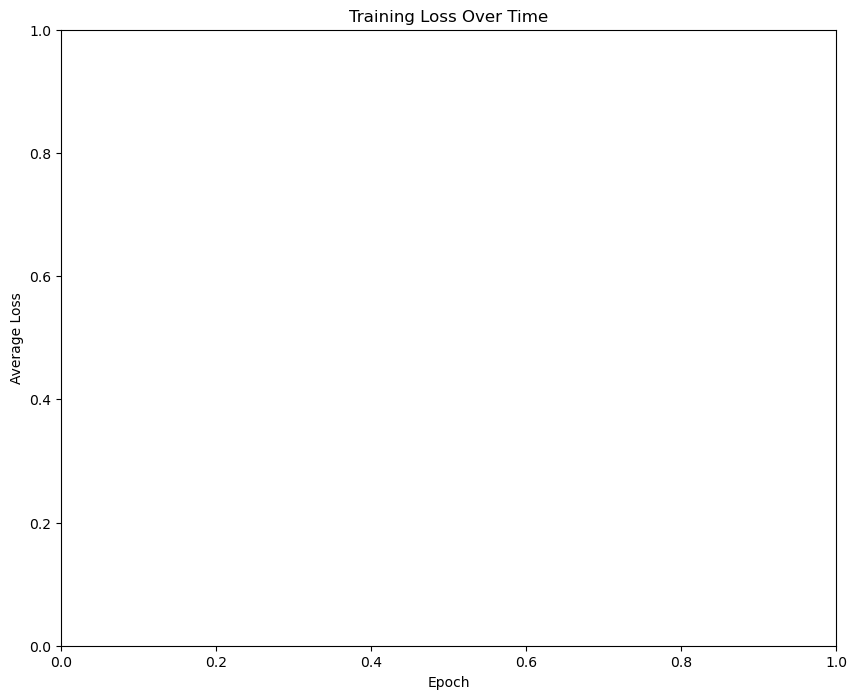

In [51]:
import numpy as np
import matplotlib.pyplot as plt

# Функция активации сигмоида
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Добавление смещения к входным данным
def add_bias(X):
    return np.concatenate([X, 0.5 * np.ones((X.shape[0], 1))], axis=1)

# Гипотетическая обучающая выборка и метки
x_train = np.array([
    [0.05, 0.1, 0.15],
    [0.2, 0.3, 0.4],
    [0.4, 0.5, 0.6],
    [0.5, 0.6, 0.7],
    [0.7, 0.8, 0.9]
])

# Добавление смещения
x_train = add_bias(x_train)


# Инициализация весов и скорости обучения
weights = np.random.randn(4)  # 4 веса, включая смещение
weights = np.zeros((4, ))
#learning_rate = 0.1
learning_rate = 1

# Обучение
total_loss = 0

for epoch in range(30):
    for i in range(len(x_train)):
        y_out = sigmoid(np.matmul(x_train[i], weights))  # Скалярное произведение и активация
        errors = y_train[i] - y_out  # Вектор ошибок

        # Вычисление квадратичной ошибки и добавление к суммарной ошибке
        loss = np.square(errors)
        total_loss += loss

        # Обновление весов
        weights += learning_rate * x_train[i] * errors

    # Вывод средней ошибки после каждой эпохи
    average_loss = total_loss / len(x_train)
    print(f"Epoch {epoch+1}, Average Loss: {average_loss}")

    # Сброс суммарной ошибки для следующей эпохи
    total_loss = 0

# Отображение результатов
plt.figure(figsize=(10, 8))
plt.xlabel('Epoch')
plt.ylabel('Average Loss')
plt.title('Training Loss Over Time')
plt.show()


Trained weights: [3.0909333  0.09907878]


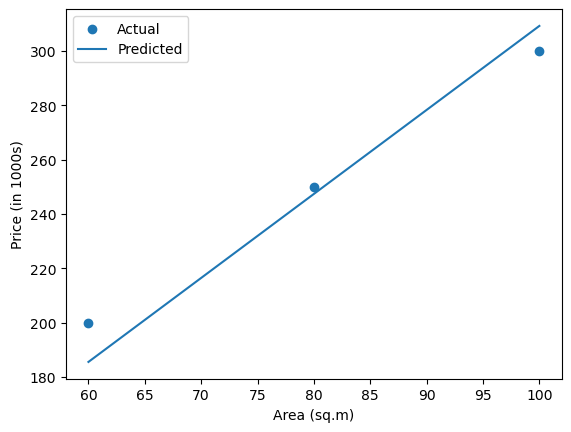

In [52]:
import numpy as np
import matplotlib.pyplot as plt

# Функция активации (здесь её нет, поскольку это простая линейная регрессия)
def identity(x):
    return x

# Обучающая выборка
x_train = np.array([60, 80, 100]).reshape(-1, 1) # Площадь
y_train = np.array([200, 250, 300])  # Стоимость

# Добавление смещения (bias)
x_train_bias = np.c_[x_train, np.ones(x_train.shape[0])]

# Инициализация весов и скорости обучения
weights = np.zeros(2)
learning_rate = 0.00001

# Обучение
for epoch in range(1000):
    for i in range(len(x_train)):
        y_pred = identity(np.dot(x_train_bias[i], weights))  # Предсказание модели
        error = y_train[i] - y_pred  # Ошибка

        # Обновление весов
        weights += learning_rate * x_train_bias[i] * error

# Вывод обученных весов
print("Trained weights:", weights)

# Визуализация результатов
plt.scatter(x_train, y_train, label='Actual')
plt.plot(x_train, np.dot(x_train_bias, weights), label='Predicted')
plt.xlabel('Area (sq.m)')
plt.ylabel('Price (in 1000s)')
plt.legend()
plt.show()
